# Zufallszahlen Erzeugen

## Übungsblatt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


### Aufgabe 1: Vergleich zwischen Erwartungswert und Mittelwert von Zufallszahlen

Der Mittelwert von Zufallszahlen ist ein Schätzer für den Erwartungswert. In dieser Aufgabe soll der Fehler dieser Schätzung, also die Differenz zwischen dem Mittelwert einer Stichprobe $\bar{x}$ und dem Erwartungswert der Verteilung $E(x)$ in Abhängigkeit des Stichprobenumfangs $n$ untersucht werden.

- Benutze die Funktion [`np.logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html), um ein Array von Stichprobenumfängen von $1$ und $10^8$ zu erzeugen. Wir brauchen Integers, also benutze `dtype=int`.
- Ziehe mithilfe von [`rng.normal`](https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.normal.html) für jeden Stichprobenumfang eine entsprechende Menge an Zufallszahlen aus einer Normalverteilung mit $\mu = 0$, $\sigma = 1$.
- Berechne für jede Stichprobe die Differenz des Mittelwerts der Zufallszahlen zum Erwartungswert.
- Stelle den Betrag dieser Differenz als Funktion des Stichprobenumfangs in einem zweifach logarithmischen Diagramm dar.

Was fällt dir auf? Was passiert mit der Differenz wenn der Stichprobenumfang zunimmt?

In [2]:
rng = np.random.default_rng(42)


In [3]:
# Berechnung
stichproben = np.logspace(0,8,dtype=int)

mu = 0 
sigma = 1 

stichproben.mean()
difflist  = []

for n in stichproben:
    x = rng.normal(mu,sigma,n)
    diff =  abs(mu - x.mean())
    difflist.append(diff)

#list- comprehension 
ns = np.logspace(0,8,dtype=int )
errors = [abs(np.mean(rng.normal(mu,sigma,n)))- mu for n in ns ]

In [4]:
stichproben


array([        1,         1,         2,         3,         4,         6,
               9,        13,        20,        29,        42,        62,
              91,       132,       193,       281,       409,       596,
             868,      1264,      1842,      2682,      3906,      5689,
            8286,     12067,     17575,     25595,     37275,     54286,
           79060,    115139,    167683,    244205,    355648,    517947,
          754312,   1098541,   1599858,   2329951,   3393221,   4941713,
         7196856,  10481131,  15264179,  22229964,  32374575,  47148663,
        68664884, 100000000])

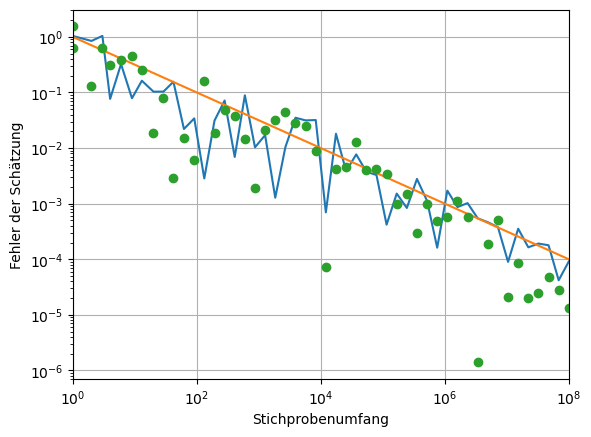

In [5]:
# Darstellung
plt.loglog(stichproben,difflist)
plt.loglog(stichproben,sigma/stichproben**0.5)

plt.loglog(ns, errors, "o")
plt.xlabel("Stichprobenumfang")
plt.ylabel("Fehler der Schätzung")
plt.xlim(np.min(ns), np.max(ns))
plt.grid()
plt.show()

Die hier berechnete Differenz wird auch als [Standardfehler](https://de.wikipedia.org/wiki/Standardfehler) bezeichnet. Er ist ein Mass für die Genauigkeit der Schätzung des Erwartungswertes. Für den Mittelwert ist der Erwartungswert des Standardfehlers gleich der Standardabweichung geteilt durch die Wurzel der Stichprobengrösse, also 

$$ \sigma(\bar{X}) = \frac{\sigma}{\sqrt{n}} $$

Plotte $\sigma/\sqrt{n}$ zusammen mit der oben berechneten Differenz.

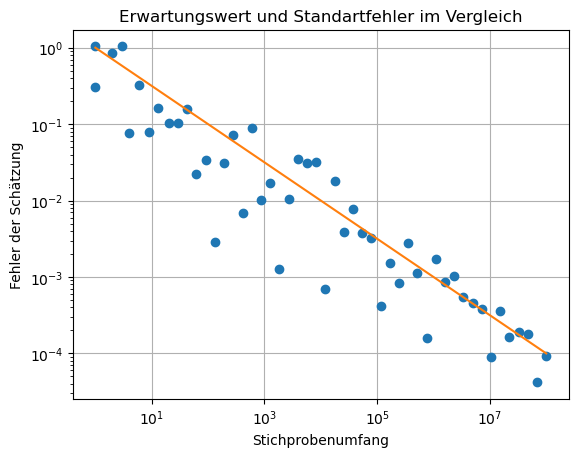

In [6]:
# Vergleich mit Erwartungswert des Standardfehlers
plt.loglog(stichproben,difflist ,'o')
plt.loglog(stichproben,sigma/stichproben**0.5)
plt.xlabel("Stichprobenumfang")
plt.ylabel("Fehler der Schätzung")
plt.title("Erwartungswert und Standartfehler im Vergleich")
plt.grid()

### Aufgabe 2: Inversionsmethode

Mithilfe der [Inversionsmethode](https://de.wikipedia.org/wiki/Inversionsmethode) können Zufallszahlen aus einer beliebigen Wahrscheinlichkeitsverteilung erzeugt werden. Dazu zieht man Zahlen aus der Gleichverteilung $U(0,1)$ und wendet auf diese die Umkehrfunktion der kumulativen Verteilungsfunktion $F(x)$ der gewünschten Verteilung an. Dieses Diagramm zeigt das Prinzip:

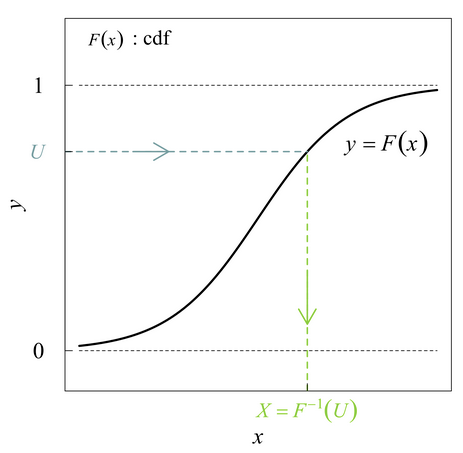

[Ta2o - Eigenes Werk](https://de.wikipedia.org/wiki/Inversionsmethode#/media/Datei:Inversion_method2.svg), [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), via Wikimedia Commons

- ["Inversionsmethode" - Wikipedia](https://de.wikipedia.org/wiki/Inversionsmethode)

#### Theorie

Die kumulative Verteilungsfunktion $F(x)$ (engl. *cumulative distribution function*, CDF) gibt die Wahrscheinlichkeit an, dass eine Zufallsvariable $X$ einen Wert kleiner oder gleich $x$ annimmt, also

$$ F(x) = P(X \leq x) $$

Daher ist $F(x)$ das Integral der [Wahrscheinlichkeitsdichte](https://de.wikipedia.org/wiki/Wahrscheinlichkeitsdichtefunktion) $f(x)$ (engl. *probability density function*, PDF):

$$ F(x) = \int_{-\infty}^x f(x') \,dx' $$

Die Umkehrfunktion $F^{-1}(u)$ ordnet nun jeder Zahl $u \in [0,1]$ den Wert $x$ zu, für den $F(x) = u$ gilt.

#### Vorgehen

Die Inversionsmethode funktioniert also so:

1. Ziehe eine Zahl $u$ aus der Gleichverteilung $U(0,1)$.
2. Berechne $x = F^{-1}(u)$. $x$ ist nun eine Zufallszahl zur gewünschten Wahrscheinlichkeit $F(x)$.

#### Auftrag

In dieser Übung sollen Zufallszahlen der [Beta-Verteilung](https://de.wikipedia.org/wiki/Beta-Verteilung) erzeugt werden. Die Wahrscheinlichkeitsdichte der Beta-Verteilung kann mithilfe der Funktion [scipy.stats.beta.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) berechnet werden. Wir gehen so vor:

- Die kumulative Verteilungsfunktion $F(x)$ wird mit numerischer Integration an 100 Punkten berechet.
- Daraus wird eine Interpolationsfunktion erstellt, die $F(x)$ für beliebige $x$ berechnen kann.
- Diese wird anschliessend benutzt, um die Umkehrung $F^{-1}(u)$ numerisch zu berechnen.
- Zum Schluss wird alles zusammengesetzt, um aus einer gleichvereilten Zufallszahl $u$ eine Zufallszahl $x$ aus der Beta-Verteilung zu erzeugen.


#### a) Wahrscheinlichkeitsdichte der Beta-Verteilung berechnen und darstellen

Die Beta-Verteilung ist definiert für $x \in [0, 1]$ und hat zwei Parameter $\alpha$ und $\beta$. Die Wahrscheinlichkeitsdichte $f(x)$ kann mit [scipy.stats.beta.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html). berechnet werden.

Berechne `pdf = f(x)` für $\alpha = 2$ und $\beta = 5$ an 100 Punkten im Intervall $x \in [0, 1]$ und stelle diese in einem Diagramm dar.

- ["Betaverteilung" - Wikipedia](https://de.wikipedia.org/wiki/Beta-Verteilung)

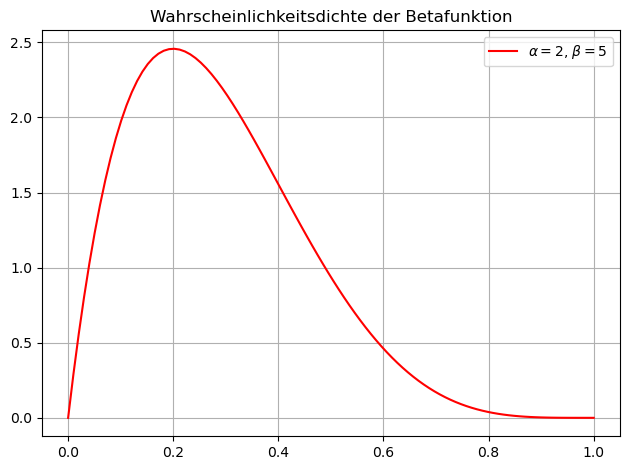

In [17]:
# Parameter der Beta-Verteilung
alpha = 2
beta = 5

x = np.linspace(0,1,100)
# Berechne die PDF für jeden x-Wert
pdf = scipy.stats.beta.pdf(x,alpha,beta)

plt.plot(x,pdf, color = "red", label = f"$\\alpha={alpha}$, $\\beta={beta}$")
plt.title("Wahrscheinlichkeitsdichte der Betafunktion")
plt.legend()
plt.tight_layout()
plt.grid()

#### b) Verteilungsfunktion der Beta-Verteilung numerisch berechnen

Schreibe eine Funktion `F(x, alpha, beta)`, welche die (kumulative) Verteilungsfunktion der Beta-Verteilung numerisch berechnet. Da es sich um das Integral

$$ F(x) = \int_0^x f(x') dx' $$

handelt, kann dazu die Funktion [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) verwendet werden.

Benutze deine Funktion, um `cdf = F(x)` für $\alpha = 2$ und $\beta = 5$ an 100 Punkten im Intervall $x \in [0, 1]$ zu berechnen und stelle diese in einem Diagramm dar.

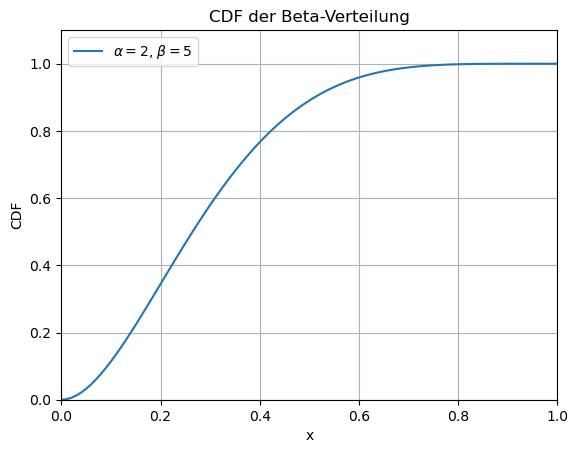

In [8]:
def F(x,alpha,beta):
    f = lambda x: scipy.stats.beta.pdf(x,alpha,beta)
    result  = scipy.integrate.quad(f,0,x)
    return result[0]
cdf = np.array([F(x_i, alpha, beta) for x_i in x])

plt.plot(x, cdf, label=f"$\\alpha={alpha}$, $\\beta={beta}$")
plt.xlabel("x")
plt.ylabel("CDF")
plt.title(f"CDF der Beta-Verteilung")
plt.xlim(x.min(), x.max())
plt.ylim(0, 1.1)
plt.legend()
plt.grid()
plt.show()

#### c) Interpolationsfunktion der Verteilungsfunktion

Benutze [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html), um eine lineare Interpolationsfunktion der berechneten Werte von `F(x)` zu erstellen. Nenne diese `F_interp`.

Setze in `interp1d` die Option `fill_value="extrapolate"`, damit die Interpolationsfunktion `F_interp` später auch am Rand des Intervalls $[0, 1]$ fehlerlos invertiert werden kann.

Teste deine Funktion mit dem Wert $x = 0.5$. Dies soll $0.890553262311416$ ergeben.


In [9]:
F_interp = scipy.interpolate.interp1d(x,cdf,fill_value="extrapolate")
print(F_interp(0.5))

0.890553262311416


#### d) Wahrscheinlichkeitsfunktion invertieren

Nun soll zu jedem $u \in [0,1]$ das $x$ mit $F(x) = u$ gefunden werden, also $x = F^{-1}(u)$.

Schreibe dazu eine Funktion `F_inv(u)`, welche [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) und `F_interp(x)` nutzt, um die Gleichung $F(x) - u = 0$ löst und $x$ zurückgibt. Nutze `x0 = 0.5` als Startwert und erhöhe die maximiale Anzahl an Iterationen auf 100.

Teste deine Funktion mit dem Wert $u = 0.5$. Dies soll $0.26446285938954506$ geben.


In [10]:
def F_inv(u, x0 = 0.5 , maxiter=100):
    return scipy.optimize.newton(lambda x : F_interp(x)- u, x0, maxiter=maxiter )

In [11]:
F_inv(0.5)

0.264462859389545

#### e) Zufallszahlen aus der Beta-Verteilung erzeugen

Schreibe zum Abschluss eine Funktion `random_beta(n)`, die $n$ Zufallszahlen aus der Beta-Verteilung erzeugt.

Benutze hierfür [`rng.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html), um $n$ zufällige $u$-Werte zu generieren. Diese Werte werden dann mit `F_inv` in $x$-Werte transformiert. Diese Funktion soll ein Array mit den $x$-Werten zurückgeben.

Erzeuge mit dieser Funktion 1000 Beta-verteilte Zahlen. Stelle die relative Häufigkeit davon in einem Histogramm dar. Benutze hierfür [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) mit `density=True`. Plotte dazu die Wahrscheinlichkeitsdichte $f(x)$ aus a).


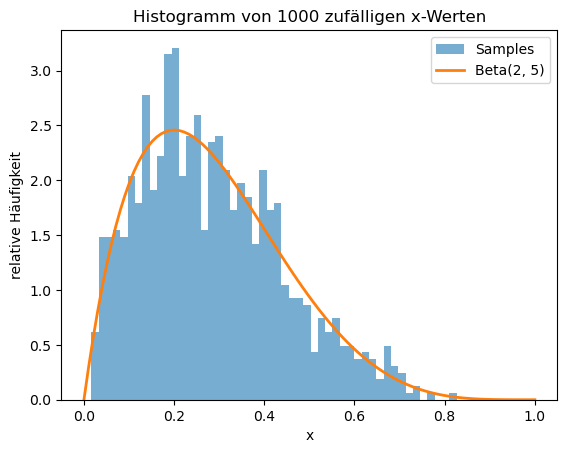

array([0.2766221 , 0.42336346, 0.47485076, 0.27354217, 0.40138377,
       0.41993274, 0.4025637 , 0.05211789, 0.19522332, 0.42450109,
       0.30145181, 0.30380822, 0.25159413, 0.05201135, 0.62781563,
       0.53539451, 0.61218305, 0.10624766, 0.49707371, 0.19420759,
       0.2772797 , 0.46688976, 0.62720919, 0.21936361, 0.40377834,
       0.05124827, 0.34331067, 0.12989771, 0.17674608, 0.41474302,
       0.06700177, 0.19142217, 0.3089054 , 0.16185294, 0.33653078,
       0.51311298, 0.08619929, 0.20340697, 0.26239006, 0.82663961,
       0.13312981, 0.42819311, 0.20223065, 0.41349975, 0.13528481,
       0.44496567, 0.16450708, 0.68773111, 0.18606957, 0.30265953,
       0.02715783, 0.06142011, 0.68461886, 0.2538544 , 0.12256744,
       0.32172013, 0.44210282, 0.33489682, 0.12105769, 0.12893932,
       0.11800968, 0.17612818, 0.21917393, 0.24004261, 0.14487557,
       0.13508544, 0.29266663, 0.39420524, 0.23741046, 0.39786019,
       0.06799775, 0.7298599 , 0.31177526, 0.41186253, 0.25580

In [18]:
def random_beta(n,rng ):
    u = rng.uniform(0,1,n)
    return np.array(list(map(F_inv,u)))

n = 1000
random_beta_values = random_beta(n,rng)

# Plotte Histogramm der zufälligen x-Werte
plt.hist(random_beta_values, bins=50, density=True, alpha=0.6, label="Samples")
plt.plot(x, pdf, label=f"Beta({alpha}, {beta})", linewidth=2)
plt.xlabel("x")
plt.ylabel("relative Häufigkeit")
plt.title(f"Histogramm von {n} zufälligen x-Werten")
plt.legend()
plt.show()


## Unterschied zwischen `list(map())` und `zip(enumerate())`
``list(map())``:    Die Funktion map() wendet eine angegebene Funktion auf jedes Element            einer oder mehrerer Sequenzen an und gibt das Ergebnis als Iterable zurück. Das `list()`-Statement wird verwendet, um das Iterable in eine Liste umzuwandeln. In diesem Fall wird die Funktion auf jedes Element angewendet, und das Ergebnis ist eine Liste der transformierten Werte.

`zip(enumerate())`: Die Funktion `enumerate()` gibt ein Iterable zurück, das Tupel enthält, bestehend aus einem Index und dem entsprechenden Element einer Sequenz. `zip()` kombiniert mehrere Iterables (in diesem Fall das Iterable von `enumerate())` in Tupeln und gibt ein Iterable von Tupeln zurück. Jedes Tupel enthält den Index und das entsprechende Element der zugrunde liegenden Sequenzen.

In [21]:
# Beispiel-Daten
names = ["Alice", "Bob", "Charlie"]
ages = [25, 32, 45]

# Verwendung von list(map())
name_lengths = list(map(len, names))
# Ergebnis: [5, 3, 7]

# Verwendung von zip(enumerate())
index_names = list(zip(enumerate(names)))
# Ergebnis: [(0, 'Alice'), (1, 'Bob'), (2, 'Charlie')]

print(name_lengths)
print(index_names)


[5, 3, 7]
[((0, 'Alice'),), ((1, 'Bob'),), ((2, 'Charlie'),)]
